In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#!pip install imagesize
import imagesize
import numpy as np
import pandas as pd
from collections import Counter

### Load data

In [19]:
#unzip data
import zipfile
with zipfile.ZipFile("data/brain_tumor_classification_dataset.zip","r") as zip_ref:
    zip_ref.extractall("data")

### Explore data

In [20]:
directory="/home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset"
train_directory="/home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Training"
test_directory="/home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Testing"

file_count = sum(len(files) for _, _, files in os.walk(directory))
print(file_count)

3267


In [21]:
#get number of training images
file_count_train = sum(len(files) for _, _, files in os.walk(train_directory))
print(file_count_train)

2871


In [22]:
#get number of test images
file_count_test = sum(len(files) for _, _, files in os.walk(test_directory))
print(file_count_test)

395


In [34]:
#get all filenames
filenames = list(Path(".").rglob("*.[jJ][pP][gG]"))

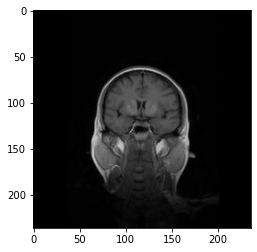

In [24]:
#let's visualize a few random images
img = mpimg.imread(filenames[5])
imgplot = plt.imshow(img)
plt.show()

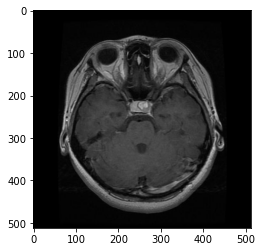

In [25]:
img = mpimg.imread(filenames[3000])
imgplot = plt.imshow(img)
plt.show()

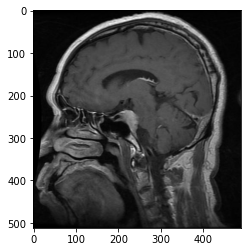

In [26]:
img = mpimg.imread(filenames[248])
imgplot = plt.imshow(img)
plt.show()

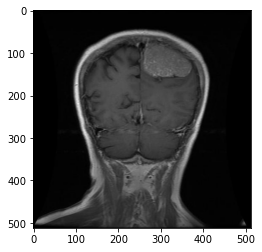

In [27]:
img = mpimg.imread(filenames[776])
imgplot = plt.imshow(img)
plt.show()

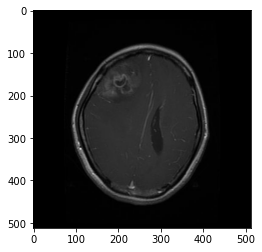

In [28]:
img = mpimg.imread(filenames[1895])
imgplot = plt.imshow(img)
plt.show()

We can already see that the images have different shapes, which means we will need to reshape all of them to the same shape in order to be able to feed them to our neural network. Let's now find out what shapes do the images have currently.

In [35]:
image_shapes=[]
widths=[]
heights=[]
for i in filenames:
    #get width and height of image
    width, height = ima.get(i)
    image_shapes.append((width,height))
    widths.append(width)
    heights.append(height)

In [36]:
#get count of image shapes
Counter(image_shapes)

Counter({(236, 280): 2,
         (227, 213): 2,
         (321, 351): 2,
         (200, 248): 2,
         (236, 260): 8,
         (236, 236): 79,
         (228, 228): 2,
         (236, 228): 2,
         (200, 243): 2,
         (235, 261): 2,
         (205, 249): 2,
         (236, 268): 2,
         (236, 290): 4,
         (235, 228): 2,
         (233, 226): 2,
         (225, 259): 2,
         (236, 295): 4,
         (236, 243): 5,
         (211, 236): 2,
         (235, 227): 7,
         (208, 225): 2,
         (278, 253): 2,
         (218, 234): 2,
         (236, 231): 4,
         (236, 251): 8,
         (210, 234): 2,
         (314, 258): 2,
         (212, 236): 2,
         (234, 224): 4,
         (234, 218): 6,
         (236, 273): 2,
         (234, 234): 2,
         (234, 225): 4,
         (208, 217): 2,
         (236, 270): 2,
         (205, 214): 2,
         (236, 262): 6,
         (224, 262): 2,
         (221, 257): 2,
         (236, 300): 4,
         (201, 249): 2,
         (235, 

In [39]:
#let's find out the minimum width and minimum height, which we could use to reshape all the images
min_width=min([x for x in widths if x >= 0])
min_height=min([x for x in heights if x >= 0])
print(min_width,min_height)

174 167


Based of the data above we can see that the images also have a different width to height ratio. However, most of them have the same width and height. To be able to feed them to our neural network, we will reshape all the images to 167x167 pixels.

#### Let's get some info about classes distribution

In [40]:
#for training data
for dirpath, dirnames, filenames in os.walk(train_directory):
    number_of_class_files = len(filenames)
    print ("Files in ", dirpath, number_of_class_files)

Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Training 1
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Training/meningioma_tumor 822
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Training/no_tumor 395
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Training/glioma_tumor 826
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Training/pituitary_tumor 827


In [41]:
#for testing data
for dirpath, dirnames, filenames in os.walk(test_directory):
    number_of_class_files = len(filenames)
    print ("Files in ", dirpath, number_of_class_files)

Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Testing 1
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Testing/no_tumor 105
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Testing/meningioma_tumor 115
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Testing/pituitary_tumor 74
Files in  /home/dlmain/mcata/APPLIED DEEP LEARNING PROJECT/brain_tumor_classification_dataset/Testing/glioma_tumor 100


Let's now make some plots to analyze the class distribution

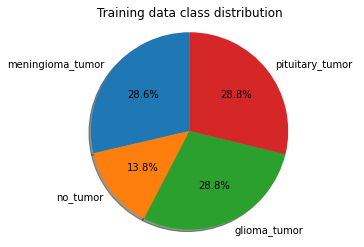

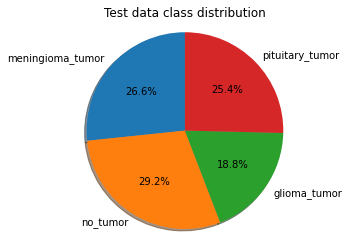

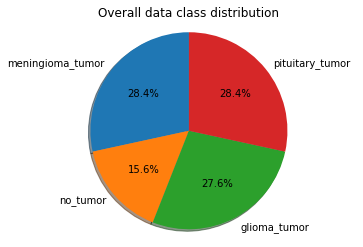

In [44]:
labels = 'meningioma_tumor', 'no_tumor', 'glioma_tumor', 'pituitary_tumor'
values_train=[822,395,826,827]
values_test=[105,115,74,100]
values_overall=np.add(values_train, values_test)

fig1, ax1 = plt.subplots()
ax1.pie(values_train, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.title.set_text('Training data class distribution')

fig2, ax2 = plt.subplots()
ax2.pie(values_test, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  
ax2.title.set_text('Test data class distribution')


fig3, ax3 = plt.subplots()
ax3.pie(values_overall, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  
ax3.title.set_text('Overall data class distribution')


plt.show()

By observing the plots above we can see that the *no_tumor* class is slightly misrepresented overall and in the training set. However, there are a lot of instances of it in the test set, so prabably it will have a rather low test accuracy.